# Data visualization with Python (plus some odds and ends)

In this notebook, we'll take a closer look at data visualization in Python. First, though, I want to cover a few important odds and ends that we either haven't discused yet or that we haven't discused much.


## Writing good code: Two suggestions

Although we don't often think of them as similar, a computer program does have some things in common with a paragraph, an essay, or a book.  Programming languages and natural languages all afford authors a great deal of creativity in choosing how to express their ideas.  And, languages of both types make it easy for authors to write poorly.  "Correct" writing, that is, writing that is syntactically and semantically correct, is only part of writing well.  Think for a moment about books or essays you've read.  What makes writing good?  What makes it bad?

A well-written computer program should be easy to read and understand.  There is much more to high-quality software than just readibility (software engineering is an entire field of study, after all), but readibility is a good place to start.  I'll likely discuss other principles of good software design and development later in the semester, but for now, let's think about how to write code that other people can read.  If nothing else, your future self will thank you.

### 1. Use comments: tell the reader what your code does and how it works

In [5]:
def is_palindrome_v1(text):
    '''
    Given a string, text, returns True if text is a palindrome,
    returns False is otherwise.
    
    text (string): A string of text to test
    '''
    if len(text) < 1:
        return False
    
    # Start at the beginning of the string and compare matching characters
    # from the endo of the strin. If we find a mismatch, return False.
    for i1 in range(len(text) // 2):
        i2 = len(text) - i1 - 1
        if text[i1] != text[i2]:
            return False
    
    # Ifwe made it out of the loop without returning False, we 
    # have a palindrome, return True.
    return True

def is_palindrome_v2(text):
    '''
    Given a string, text, returns True if text is a palindrome,
    returns False is otherwise.
    
    text (string): A string of text to test
    '''
    
    if len(text) < 1:
        return False
    elif len(text) == 1:
        return True
    
    # Extract 1st and 2nd halves of string, reverse 2nd half and
    # compare the two.
    half_len = len(text) // 2
    first_half = text[:half_len]
    second_half = text[len(text) - half_len:]
    # Reverse the 2nd half of the string.
    second_half = second_half[::-1]
    
    return first_half == second_half


In [6]:
is_palindrome_v1('amanaplanacanalpanama')

True

### 2. Write self-documenting code

In [39]:
import math

def a(b):
    c = 0
    d = 1/len(b)
    for e in b:
        c =c + e*d
    g = 0
    for h in b:
        g = g + (h - c)**2 
    return math.sqrt(g/(len(b)-1))

def std_dev(vals):
    sum_vals = 0
    for val in vals:
        sum_vals = sum_vals + val 
    mean = sum_vals/len(vals)
    
    sum_sqrs = 0
    for val in vals:
        sum_sqrs = sum_sqrs + (val - mean)**2
        
    std_dev = math.sqrt(sum_sqrs / (len(vals) -1) )
    
    return std_dev

In [41]:
nums = [4,5,6,7,4,5,4,5,6,8,9,9]

print(a(nums))

print(std_dev(nums))


1.8586407545691703
1.8586407545691703


## Arithmetic with numpy arrays


The important point I want to emphasize here is that arithmetic operations on numpy arrays are implemented _element-wise_.  This allows you take advantage of the speed of numpy's low-level array method implementations.  It also allows you to express operations on vectors and matrices very concisely, which is, as we'll see soon, quite handy.

In [42]:
import numpy as np

a = np.arange(1, 11)
b = np.arange(10, 0, -1)

In [43]:
print(a,b)

[ 1  2  3  4  5  6  7  8  9 10] [10  9  8  7  6  5  4  3  2  1]


In [44]:
a + 4 #Main thing here is that this is elementwise
      # and we do not need to write loops to do this

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [45]:
a * 4

array([ 4,  8, 12, 16, 20, 24, 28, 32, 36, 40])

In [46]:
a + b

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11])

In [47]:
a + a 

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

## Visualizing data with plotnine

### 1. Overview

There are _many_ Python libraries for visualizing data. Seriously. Take a look at this graphic by Jake VanderPlas that maps out Python data visualization libraries (from [PyCon 2017](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017))! (And it doesn't even include the library I'll be showing you!) <img alt="Python visualization landscape" src="images/Python_data_vis_landscape_VanderPlas.png" width=700px />

As you can see, you have _a lot_ of options.  Honestly, we don't care too much which library you use to visualize your data. If you've already learned another library (matplotlib and seaborn are popular), feel free to continue using it.

That said, you do have to choose _something_, so I'm going to show you [plotnine](https://plotnine.readthedocs.io/en/stable/index.html), which is currently my favorite Python data visualization library.  It provides a very intuitive approach to building plots that is outstanding for both rapid data exploration and producing publication-quality graphics.  Plotnine is based on [ggplot2](https://ggplot2.tidyverse.org/) and the [Grammar of Graphics](https://amzn.to/2ef1eWp).  If you've already learned ggplot2 in R, you should be able to use plotnine immediately.

Before we get to plotting, let's get some data to work with.

In [48]:
import pandas as pd

df = pd.read_csv('data/atlantic_storms.csv')

# Let's make things easy on ourselves and drop observations with no pressure data.
df = df.dropna(subset=['press'])

In [49]:
df

,storm_id,storm_name,year,doy,time,rectype,stormtype,lat,lng,wind,wind_k,press
127,AL011852,UNNAMED,1852,239,06:00,L,HU,30.2N,88.6W,115.0780,100.0,961.0
252,AL031853,UNNAMED,1853,246,12:00,NaN,HU,19.7N,56.2W,149.6014,130.0,924.0
346,AL031854,UNNAMED,1854,250,12:00,NaN,HU,28.0N,78.6W,126.5858,110.0,938.0
351,AL031854,UNNAMED,1854,251,18:00,NaN,HU,31.6N,81.1W,115.0780,100.0,950.0
352,AL031854,UNNAMED,1854,251,20:00,L,HU,31.7N,81.1W,115.0780,100.0,950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51835,AL202019,SEBASTIEN,2019,330,12:00,NaN,EX,52.2N,9.3W,51.7851,45.0,970.0
51836,AL202019,SEBASTIEN,2019,330,18:00,NaN,EX,52.2N,8.9W,46.0312,40.0,972.0
51837,AL202019,SEBASTIEN,2019,331,00:00,NaN,EX,51.8N,8.2W,46.0312,40.0,974.0
51838,AL202019,SEBASTIEN,2019,331,06:00,NaN,EX,51.4N,6.0W,46.0312,40.0,976.0


These data provide detailed information for Atlantic basin tropical storms, going all the way back to 1851.  I extracted these data from NOAA's raw storm track data available at [https://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html](https://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html).

### 2. Introduction to plotnine

The basic idea behing plotnine (and ggplot2), is that any data visualization can be broken up into three main components:

* The *data* that are used to generate the plot.
* Mappings of data variables to *aesthetic* components of the plot.
* The *geometric objects* that are used to actually display the data.

In plotnine, we build graphs by specifying each of these components.

Let's look at an example.

In [50]:
import plotnine as pn

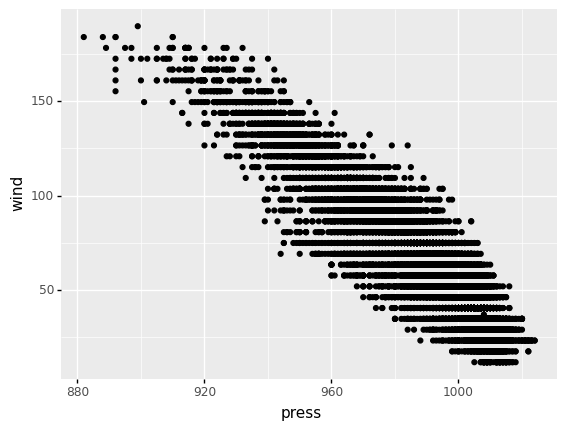

<ggplot: (2951720574799)>

In [51]:
pn.ggplot(df, pn.aes(x='press', y='wind')) + pn.geom_point()

### 3. Aesthetics

[According to the creator of ggplot2](https://r4ds.had.co.nz/data-visualisation.html), a plot _aesthetic_ is "a visual property of the objects in your plot."

The aesthetics that you are likely to use most often include:
* `x`
* `y`
* `alpha` - transparency
* `color` 
* `fill` - fill color
* `linetype`
* `shape`
* `size`

Let's give some of these a try.

/apps/python/3.8/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


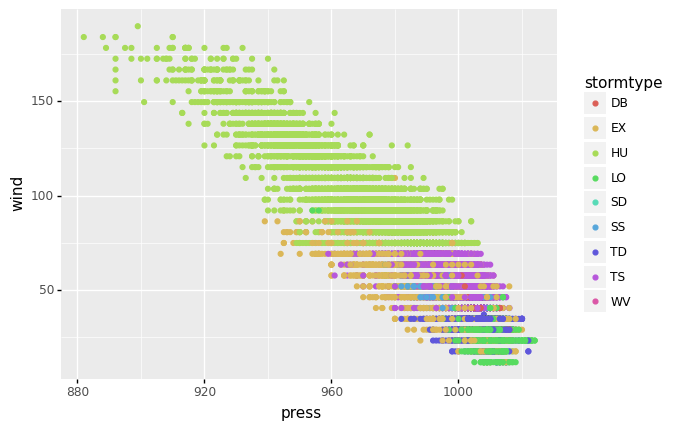

<ggplot: (2951730005935)>

In [54]:
pn.ggplot(df, pn.aes(x='press', y='wind', color='stormtype')) + pn.geom_point()

**Sidenote: Facets.**  Aesthetics are one way to add information about a categorical variable to a plot.  Another is to use facets, which create subplots for each value of a categorical variable.

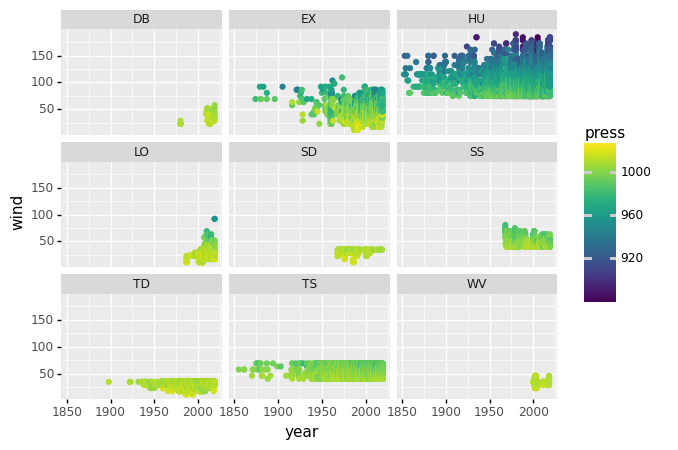

<ggplot: (2951731822050)>

In [81]:
(pn.ggplot(df, pn.aes(x='year', y='wind', color='press')) 
+ pn.geom_point() + pn.facet_wrap('stormtype') )

**Challenge 1:** Create a graph that illustrates the intensity of Atlantic basin tropical cyclones over time. Include information about the type of each storm.

/apps/python/3.8/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


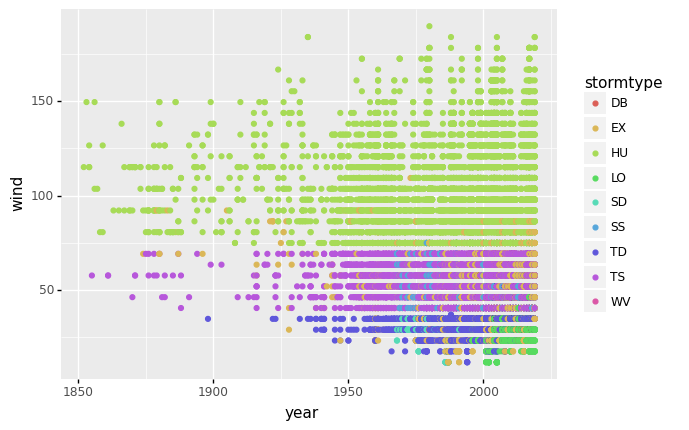

<ggplot: (2951730150292)>

In [58]:
pn.ggplot(df, pn.aes(x='year', y='wind', color='stormtype')) + pn.geom_point()

### 4. Geometric objects

In plotnine, `geom_*()` functions define the geometric objects that are used to display data.  We've already been using `geom_point()`.  Plotnine includes a very large number of these "geoms"; we will only look at a few of them here.

`geom_histogram()` visualizes the distribution of a variable.

/apps/python/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 129'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


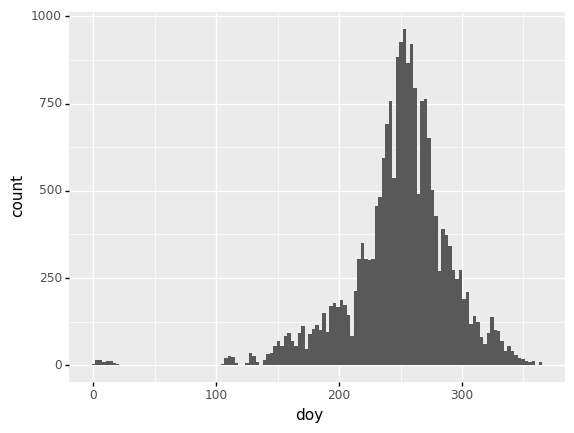

<ggplot: (2951729060006)>

In [63]:
pn.ggplot(df, pn.aes(x='doy'))+ pn.geom_histogram()

We can examine count information using `geom_bar()`.

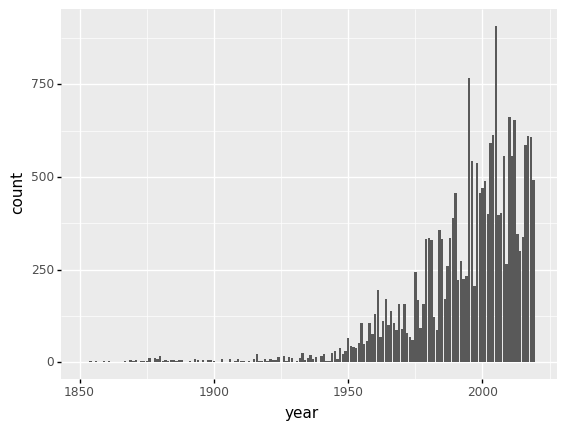

<ggplot: (2951730232631)>

In [65]:
pn.ggplot(df, pn.aes(x='year'))+ pn.geom_bar()

Box plots (`geom_boxplot()`) and violin plots (`geom_violin()`) are useful for visualizing the distributions of one variable by categories of another.

/apps/python/3.8/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/apps/python/3.8/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


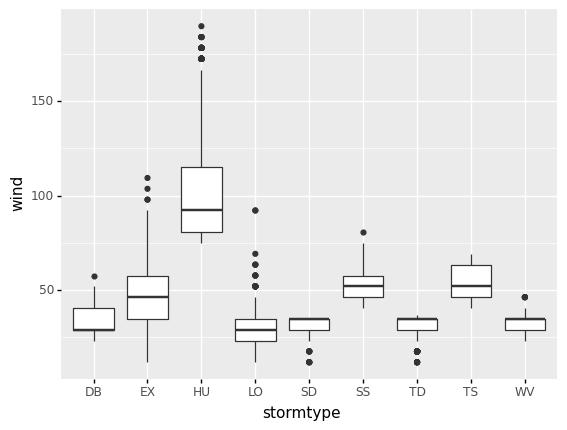

<ggplot: (2951730012260)>

In [66]:
pn.ggplot(df, pn.aes(x='stormtype', y='wind'))+ pn.geom_boxplot()

/apps/python/3.8/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


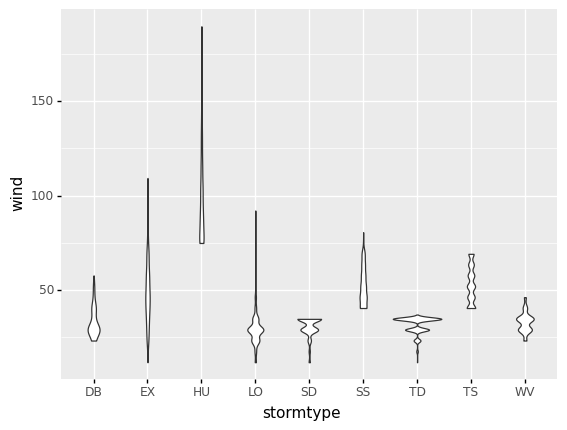

<ggplot: (2951730242118)>

In [68]:
pn.ggplot(df, pn.aes(x='stormtype', y='wind'))+ pn.geom_violin()

`geom_smooth()` generates approximate trendlines.

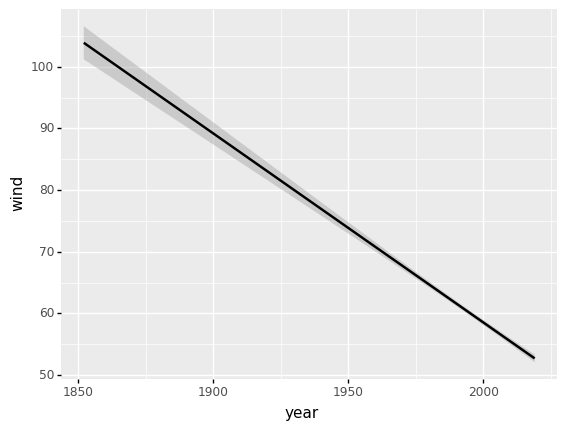

<ggplot: (2951731153833)>

In [69]:
pn.ggplot(df, pn.aes(x='year', y='wind'))+ pn.geom_smooth()

There are many, many more "geoms" supported by plotnine.  You can read about them all in the [plotnine documentation](https://plotnine.readthedocs.io/en/stable/api.html#geoms).

### 5. Combining plot components

One of the most powerful features of plotnine is its additive syntax.  This makes it easy to build complex graphics in layers by adding one component at a time to a base plot.

As an example, let's return to the trendline plot we just created.  It would be nice to also add the actual data points to this plot, and that is very easy to do with plotnine.

/apps/python/3.8/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


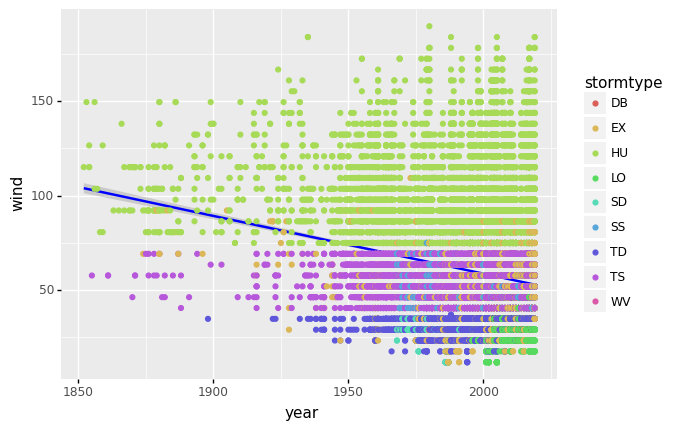

<ggplot: (2951731195254)>

In [72]:
pn.ggplot(df, pn.aes(x='year', y='wind'))+ pn.geom_smooth(color='blue') + pn.geom_point()

# Add stormtpe color
#pn.ggplot(df, pn.aes(x='year', y='wind', color='stormtype'))+ pn.geom_smooth(color='blue') + pn.geom_point()

# Bring geom_smooth to fron by moving it after geom_point
#pn.ggplot(df, pn.aes(x='year', y='wind', color='stormtype')) + pn.geom_point() + pn.geom_smooth(color='blue')

# Also try removing the color='blue' from geom_smooth
# Interesting note how setting a color can change what is plotted!

The additive syntax also allows us to customize other components of a graphic.

/apps/python/3.8/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


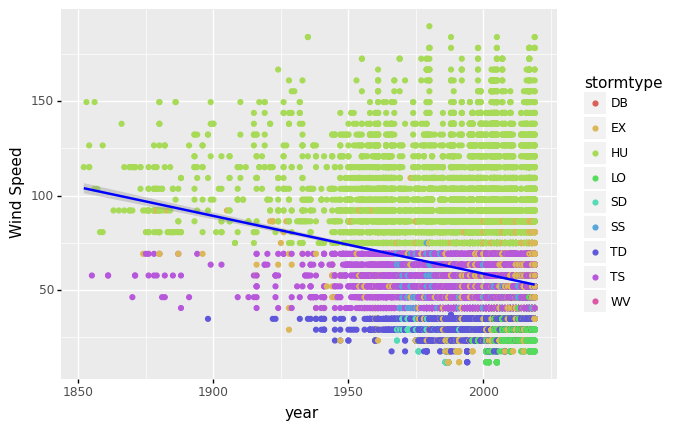

<ggplot: (2951730659347)>

In [79]:
# Note the "(" at the start (and end) to make this multiline!
(pn.ggplot(df, pn.aes(x='year', y='wind', color='stormtype'))
   + pn.geom_point() + pn.geom_smooth(color='blue') + pn.ylab('Wind Speed')
   + pn.xlab('year'))


**Challenge 2:** Create a visualization exploring some question about the cyclone data.  Here are some suggestions: Has the storm season shifted in time over the years (i.e., is the storm season earlier or later now than in the past)?  Are storm types distributed evenly across a storm season?

### 6. Conclusions

I hope you will find the ggplot2/plotnine style of creating data visualizations to be an intuitive and efficient means of exploring data.  We have covered the basic concepts behind plotnine, but we've only seen a glimpse of what it can do.  The [plotnine API reference](https://plotnine.readthedocs.io/en/stable/api.html) provides full documentation for all of plotnine's functionality.  If you'd like a more thorough introduction to the capabilities of plotnine/ggplot2, I highly recommend reading [this book chapter](https://r4ds.had.co.nz/data-visualisation.html) co-written by Hadley Wickham, the creator of ggplot2.  I should also note that while I will use plotnine for most of the examples I show in class, it is not the best choice for _every_ kind of data visualization, so I will occasionally use other plotting libraries, too.